In [ ]:
# Upload the dataset into google colab
from google.colab import files
uploaded = files.upload()

Saving air_pollution.csv to air_pollution (1).csv


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Read the dataset
data = pd.read_csv('air_pollution.csv', parse_dates=['date'], index_col='date')
data.head(4)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0


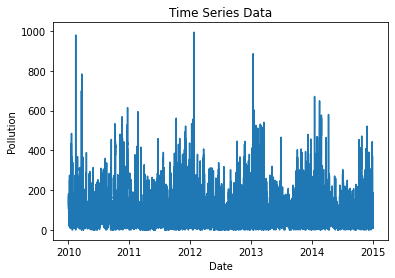

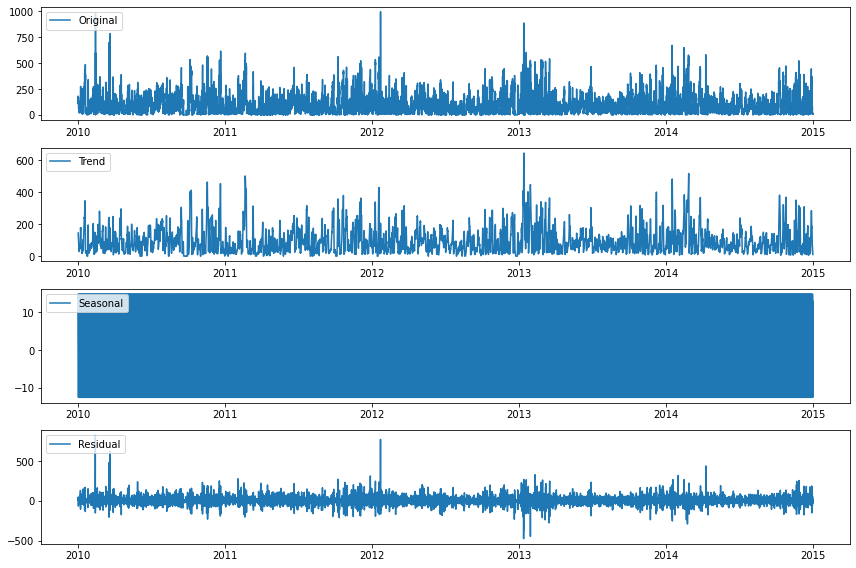


ADF Test Result

ADF Statistic: -21.00410852840915
p-value: 0.0
Critical Values:
1%: -3.430499498988984
5%: -2.8616060752745827
10%: -2.5668051697196077

The data is stationary.


In [ ]:
# Plot the time series data
plt.plot(data['pollution'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['pollution'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['pollution'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(data['pollution'].dropna())
print("\nADF Test Result\n")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

if adf_result[1] <= 0.05:
    print("\nThe data is stationary.")
else:
    print("\nThe data is non-stationary.")

In [ ]:
# Split dataset into train and test
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# Calculate MAPE between true and predicted values
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fill missing values
data['pollution'].interpolate(method='linear', inplace=True)

# Split the data into training and testing sets
n_test = 24
train, test = train_test_split(data['pollution'], n_test)

# Fit the ARIMA model
model = ARIMA(train, order=(3, 1, 0))
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=n_test)
y_test = test.values

# Compute the MAPE, RMSE, and MAE metrics
error_mape = mape(y_test, y_pred)
error_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error_mae = mean_absolute_error(y_test, y_pred)

print("\n------- The Metrices (ARIMA) -------\n")
print("Mean Absolute Percentage Error (MAPE):", error_mape)
print("Root Mean Squared Error (RMSE):", error_rmse)
print("Mean Absolute Error (MAE):", error_mae)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)



------- The Metrices (ARIMA) -------

Mean Absolute Percentage Error (MAPE): 71.8766819797776
Root Mean Squared Error (RMSE): 6.699950087880293
Mean Absolute Error (MAE): 6.434513182820678
